In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
import dsp_helpers as dsp

In [5]:
# how long the echo should be audible in seconds
echoDuration = 0.15
# the amplitude/loudness of the delayed sample as factor relative to the original
delayAmplitude = 0.3
# sample from: https://www.kemper-amps.com/forum/index.php?thread/26817-a-dry-guitar-track-for-our-tests/
# sample was resaved because the original likely had metadata introduced by audacity or other audio workstations that scipy.wavfile
# could not work with (chunk not understood)
sample = "untitled.wav"
samplingRate, audioData = wavfile.read(sample, 'r')
audioData = dsp.toMono(audioData)
assert audioData.ndim == 1

normalizedSignal = dsp.normalize(audioData)
delayInSamples = round(echoDuration * samplingRate)

impulseResponse = np.zeros(delayInSamples)
impulseResponse[0] = 1
impulseResponse[-1] = delayAmplitude

# Returns the discrete, linear convolution of two one-dimensional sequences.
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
convolutedSignal = np.convolve(normalizedSignal, impulseResponse)
print(convolutedSignal.shape)
print(normalizedSignal.shape)
dsp.normalize(convolutedSignal)
wavfile.write("convolution.wav", samplingRate, convolutedSignal)


(3308,)
()


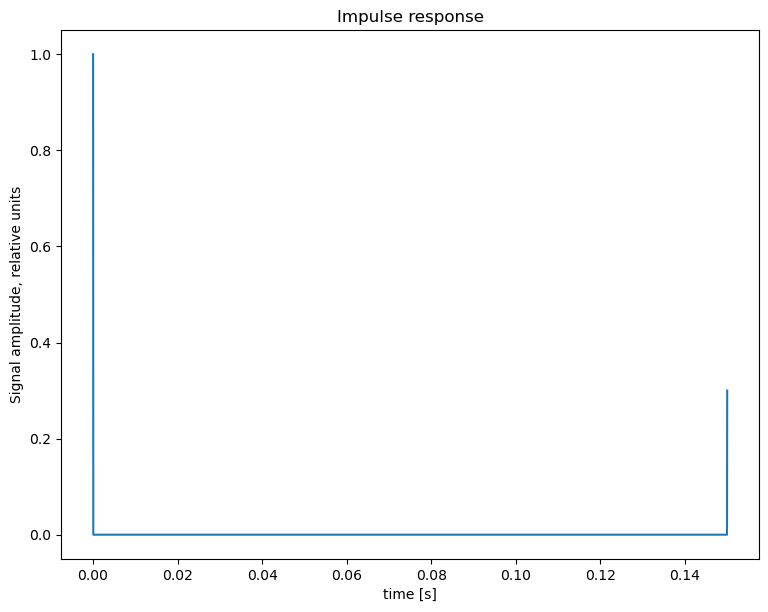

TypeError: object of type 'numpy.int16' has no len()

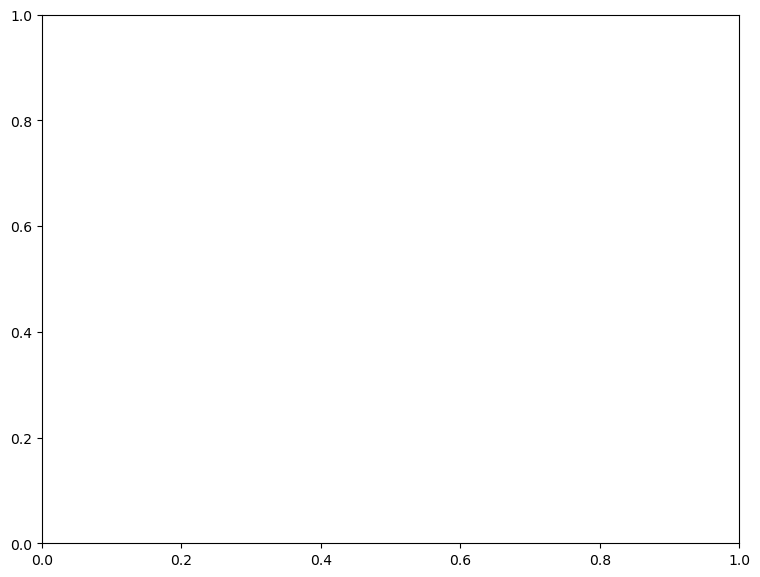

In [6]:
# plot signal against time
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

plt.figure()
ax_convolution = dsp.plot(impulseResponse, samplingRate)
ax_convolution.set(xlabel = "time [s]", ylabel = "Signal amplitude, relative units", title = "Impulse response")
plt.show()

plt.figure()
ax_normalized = dsp.plot(normalizedSignal, samplingRate)
ax_normalized.set(xlabel = "time [s]", ylabel = "Signal amplitude, relative units", title = "normalized")
plt.show()

plt.figure()
ax_convolved = dsp.plot(convolutedSignal, samplingRate)
ax_convolved.set(xlabel = "time [s]", ylabel = "Signal amplitude, relative units", title = "convoluted, amplitude factor {0}".format(delayAmplitude))
plt.show()

plt.figure()
ax_normalized = dsp.plot(normalizedSignal, samplingRate)
ax_combined = dsp.plot(convolutedSignal, samplingRate, ax_normalized)
ax_combined.set(xlabel = "time [s]", ylabel = "Signal amplitude, relative units", title = "comparison")
plt.show()



